# Table of Content
<hr style="height: 5px">

# [1. WorkFlow](#wf)

# [2. What is Logistic Regression](#lg)

# [3. Importing Library](#ib)

# [4. Loading Dataset](#ld)

# [5. Preprocing Dataset](#pd)

# [6. Preparing Dataset](#ppd)

# [7. Visualization of Training Data](#vt)

# [8. Model Building](#md)

# [9. Model Evaluation](#me)

# [10. Building Predictive System](#bp)

# [11. Conclusion](#c)
<hr style="height: 5px">

<a name='wf'></a>
 # 1. Work Flow

### Heart Data --->  Data Preprocessing ---> Train Test Split ---> Model Fiting ---> Prediction

<a name='lg'></a>
# 2. What is Logistic Regression?

### Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. 
### It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc. 
### Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
### In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
### The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
### Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.

### Here is quick comparision between Linear Regreesion  and Logistic Regression


 </img>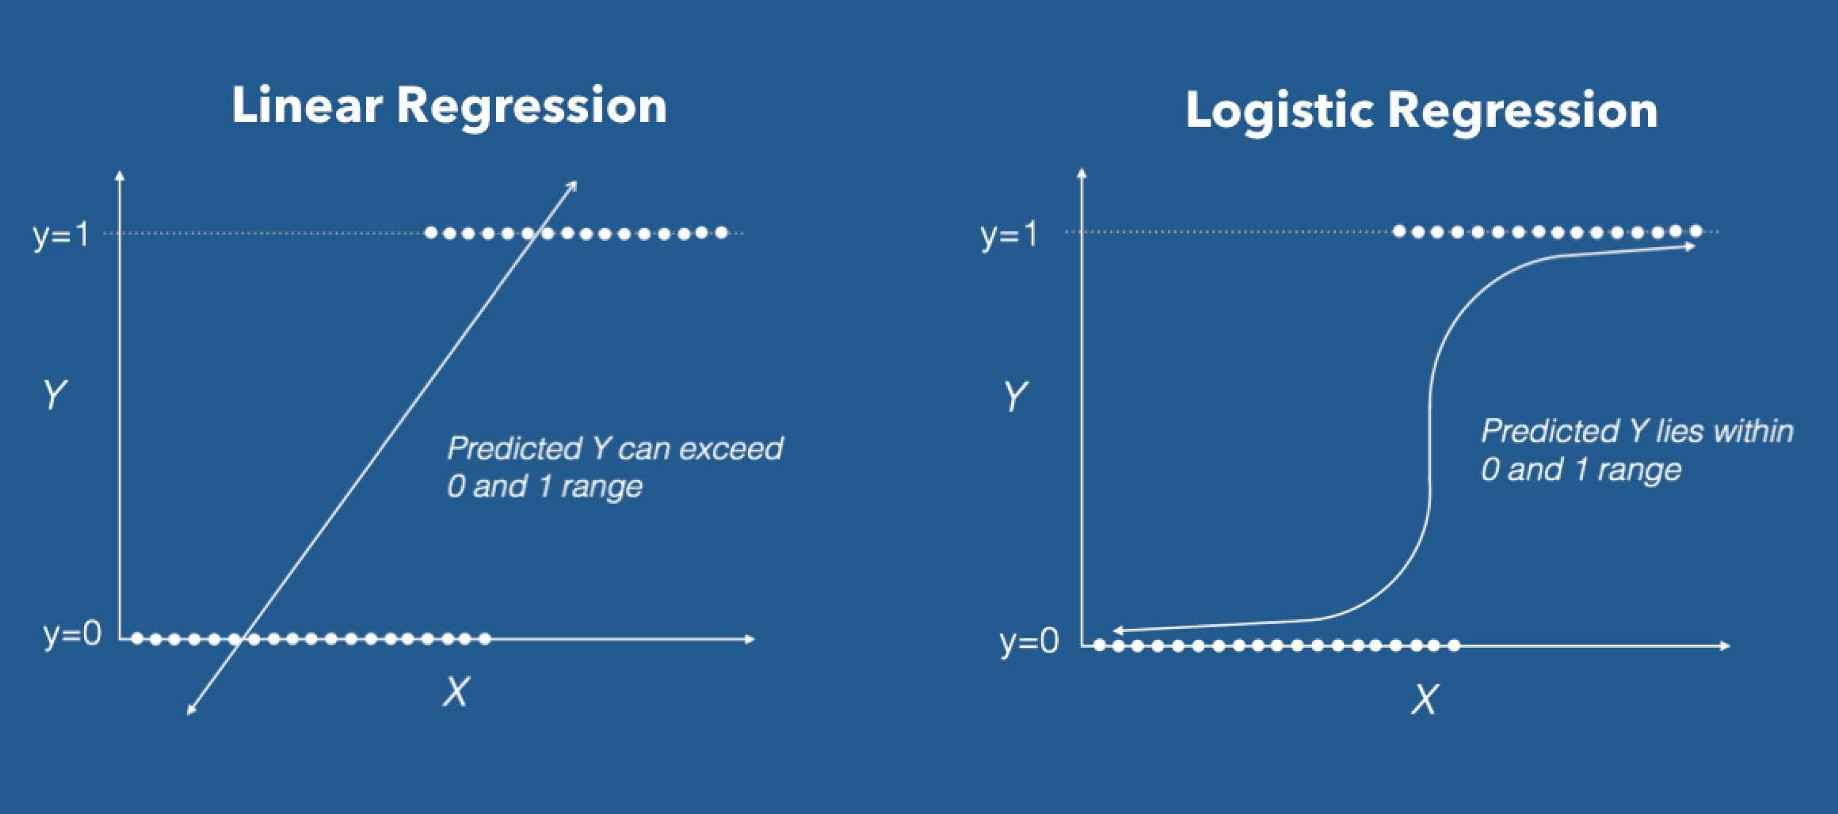

<a name='ib'></a>
# Importing Library

In [1]:
import pandas as pd  #Pandas is used to analyze data
import numpy as np   #This library contains a large number of mathematical, algebraic, and transformation functions
import matplotlib.pyplot as plt   # Used for Visualization of data
import seaborn as sns     #Seaborn is a Python data visualization library based on matplotlib
from sklearn.model_selection import train_test_split  # Used for splitting data into train data and test data
from sklearn.linear_model import LogisticRegression   # Importing Logistic Regression model
from sklearn.metrics import accuracy_score # To Calculate Accuracy classification score
#matplotlib inline sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

<a name='ld'></a>
#  Loading dataset

In [2]:
# loading dataset which is in csv format using pd.read_csv(filename_with_extension)

df=pd.read_csv('Data/heart_disease.csv')

In [3]:
# Printing number of rows and column using shape

df.shape

(303, 14)

In [4]:
#Printing First 5 rows of the dataset using head()

df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
#Printing Last 5 rows of the dataset using tail()

df.tail()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [6]:
# Getting more Information of dataset using info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


<a name='pd'></a>
# Preprocessing of Dataset

### 1. Dealing with Missing Value 
### 2.Converting cateogerical value to numeric value

In [7]:
# Checking for Missing Value in whole dataset using 
# isnull(): Returns a Boolean value that indicates whether an expression contains no valid data (Null)

df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [8]:
# AS we can see we have 2 colimn which have missing value (Ca and Thal)
# Dealing with Missing Value: we will replace missing value with 0

In [9]:
#Replcaing missing value in colimn Ca with 0 using fillna():
#fiilna():

df['Ca'].fillna(0,inplace=True) 

In [10]:
# Checkling if Ca is having null value since we fill null value it should return 0

df['Ca'].isnull().sum()

0

In [11]:
# Checking for Missing Value again if any leftover

df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
AHD          0
dtype: int64

###### Note we still have one column Thal having missing value, we will deal with in a bit 

In [12]:
# Converting Careogorical data to numeric data

In [13]:
# Columns that needs to be changed
# 1. ChestPain
# 2. Thal
# 3. AHD

In [14]:
# Printing ChestPain column without processing 

df['ChestPain']

1           typical
2      asymptomatic
3      asymptomatic
4        nonanginal
5        nontypical
           ...     
299         typical
300    asymptomatic
301    asymptomatic
302      nontypical
303      nonanginal
Name: ChestPain, Length: 303, dtype: object

In [15]:
#value_count():return a Series containing counts of unique values

df['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [16]:
# replacing the value using replace()

df['ChestPain'].replace(['typical','nontypical','nonanginal','asymptomatic'],[1,2,3,4],inplace=True)

In [17]:
# Printing to check whether value have changed or not

df['ChestPain']

1      1
2      4
3      4
4      3
5      2
      ..
299    1
300    4
301    4
302    2
303    3
Name: ChestPain, Length: 303, dtype: int64

In [18]:
#verifying the values are replaced properly using value_count()

df['ChestPain'].value_counts()

4    144
3     86
2     50
1     23
Name: ChestPain, dtype: int64

In [19]:
# Replacing value using replace()

df['Thal'].replace(['normal','fixed','reversable'],[1,2,3],inplace=True)

In [20]:
#verifying the values are replaced properly using value_count()

df['Thal'].value_counts()

1.0    166
3.0    117
2.0     18
Name: Thal, dtype: int64

In [21]:
166+117+18

301

#### As we  have 303 rows we have 2 rows missing

#### We now deal with missing value 

In [22]:
# We are filling 0 in place of null value

df['Thal'].fillna(0,inplace=True)

In [23]:
# Verifying the values are replaced properly using value_count()

df['Thal'].value_counts()

1.0    166
3.0    117
2.0     18
0.0      2
Name: Thal, dtype: int64

In [24]:
#Replacing the value using replace()

df['AHD'].replace(['No','Yes'],[0,1],inplace=True)

In [25]:
# Checking if changes are done

df['AHD']

1      0
2      1
3      1
4      0
5      0
      ..
299    1
300    1
301    1
302    1
303    0
Name: AHD, Length: 303, dtype: int64

In [26]:
# Verifying the values are replaced properly using value_count()

df['AHD'].value_counts()

0    164
1    139
Name: AHD, dtype: int64

In [27]:
164+139

303

In [28]:
#Final look at the dataset

df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,3.0,1
300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,3.0,1
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,3.0,1
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1.0,1


<a name='ppd'></a>
#  Preparing Data 

In [29]:
# We are removing AHD which is target and store it in other varibale 

X=df.drop(columns='AHD',axis=1)

y=df['AHD']

In [30]:
# Printing X where we have removed traget variable

X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,3.0
300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,3.0
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,3.0
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1.0


In [31]:
# Printing Y which as only traget variable

y

1      0
2      1
3      1
4      0
5      0
      ..
299    1
300    1
301    1
302    1
303    0
Name: AHD, Length: 303, dtype: int64

In [32]:
# Spliting data into train data and test data

X_train,X_test,y_train,y_test=train=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [33]:
# Printing the size of X training dataset

X_train.shape

(242, 13)

In [34]:
# Printing the size of X testing dataset

X_test.shape

(61, 13)

In [35]:
# Printing the size of Y training dataset

y_train.shape

(242,)

In [36]:
# Printing the size of Y testing dataset

y_test.shape

(61,)

<a name='vt'></a>
# Visualizing Training Data

<AxesSubplot:>

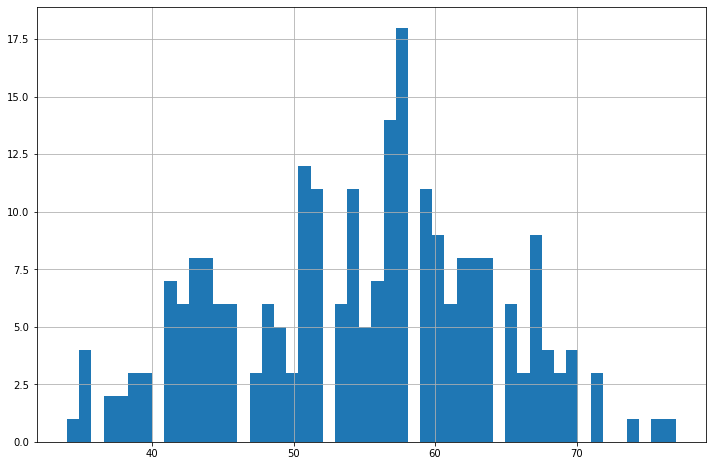

In [37]:
# We are just plotting histogram of Age

X_train['Age'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

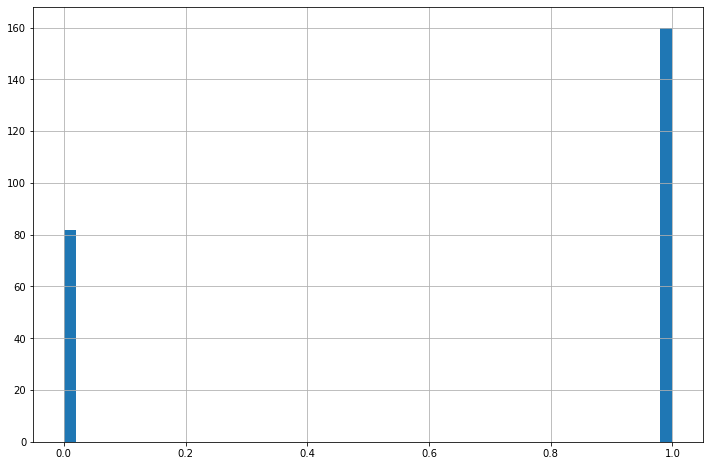

In [38]:
# We are just plotting histogram of Sex

X_train['Sex'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

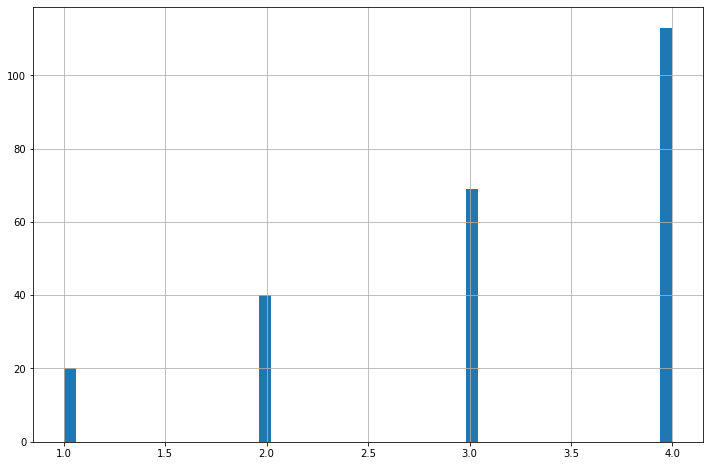

In [39]:
# We are just plotting histogram of ChestPain

X_train['ChestPain'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

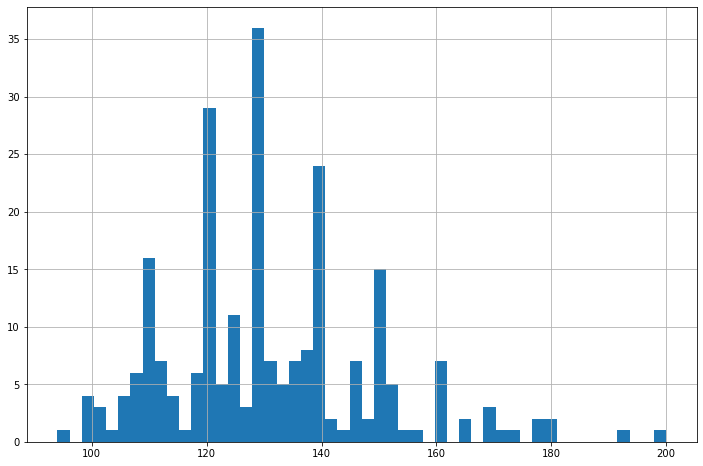

In [40]:
# We are just plotting histogram of RestBP

X_train['RestBP'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

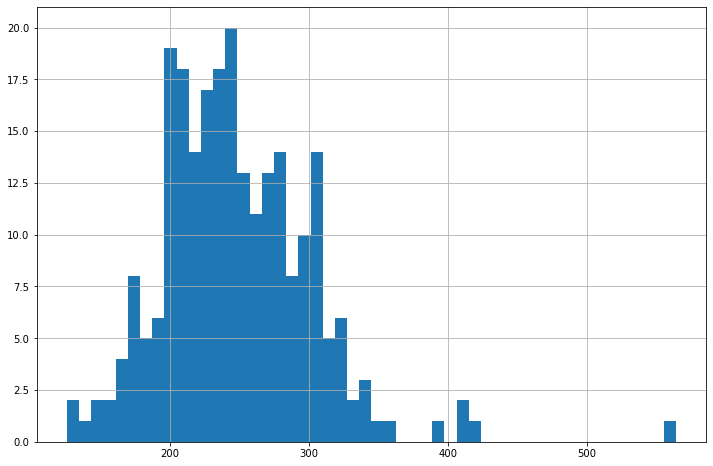

In [41]:
# We are just plotting histogram of Chol

X_train['Chol'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

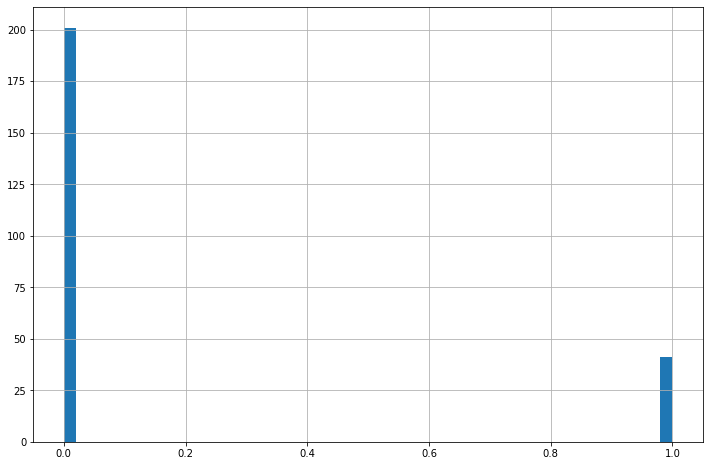

In [42]:
# We are just plotting histogram of Fbs

X_train['Fbs'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

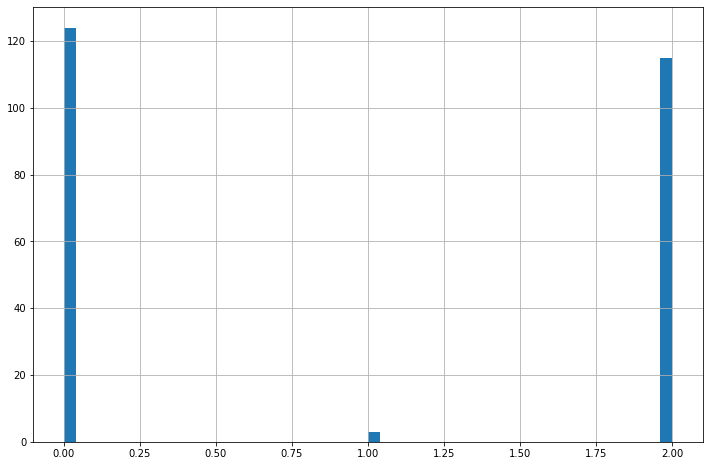

In [43]:
# We are just plotting histogram of RestECG

X_train['RestECG'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

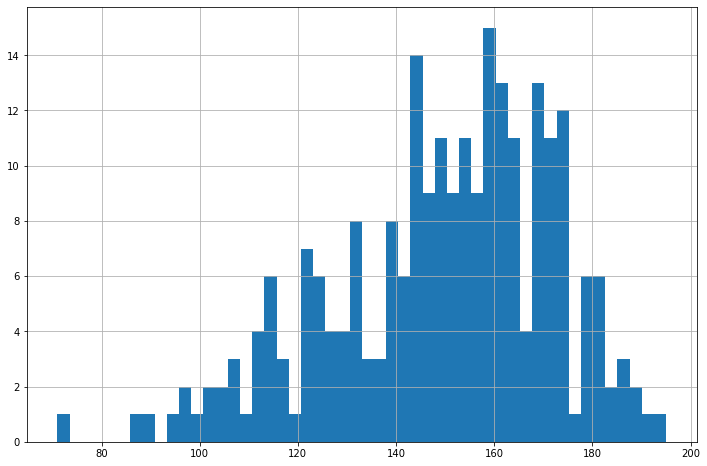

In [44]:
# We are just plotting histogram of MaxHR

X_train['MaxHR'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

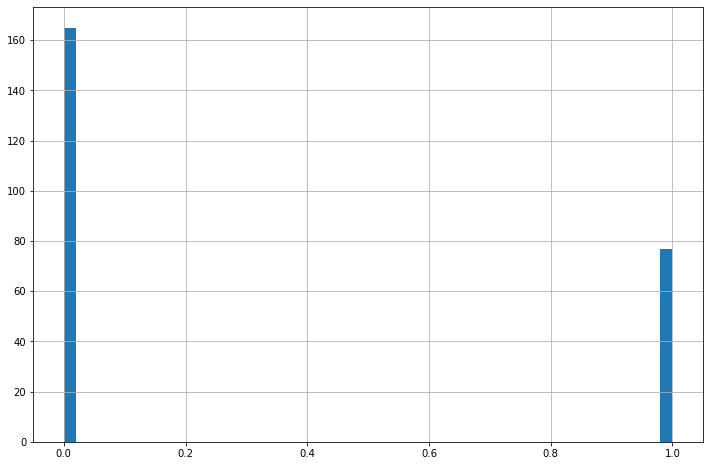

In [45]:
# We are just plotting histogram of ExAng

X_train['ExAng'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

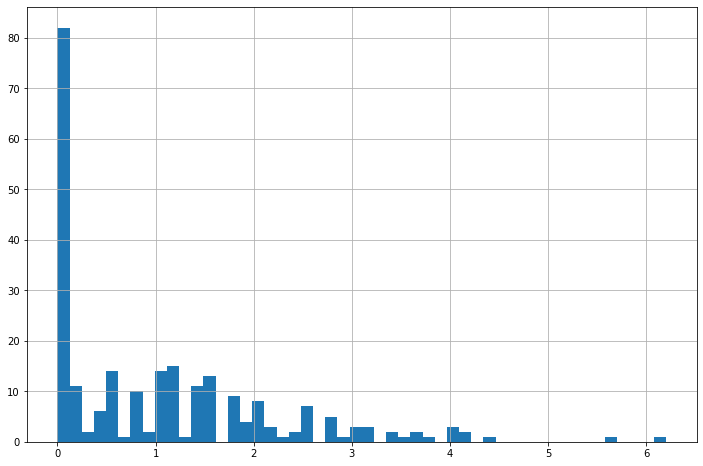

In [46]:
# We are just plotting histogram of Oldpeak

X_train['Oldpeak'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

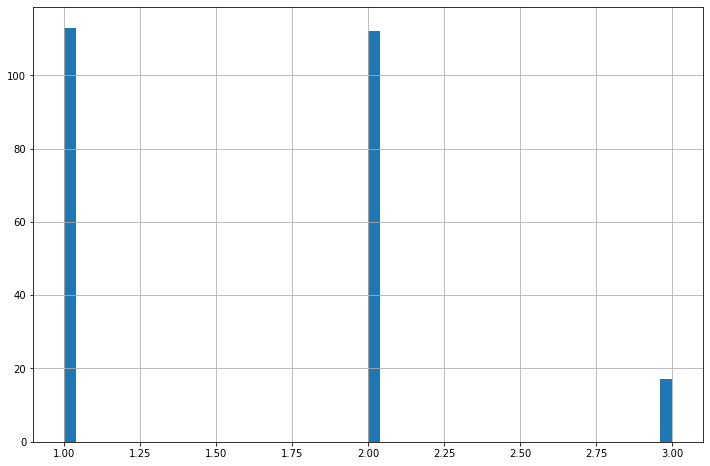

In [47]:
# We are just plotting histogram of Slope

X_train['Slope'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

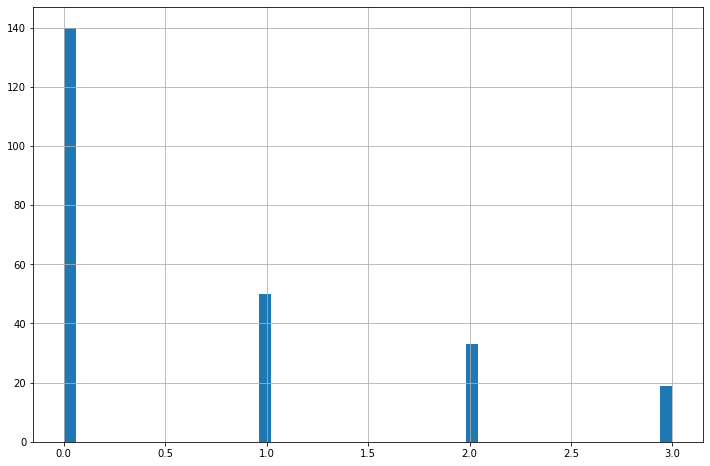

In [48]:
# We are just plotting histogram of Ca

X_train['Ca'].hist(figsize=(12,8),bins=50)

<AxesSubplot:>

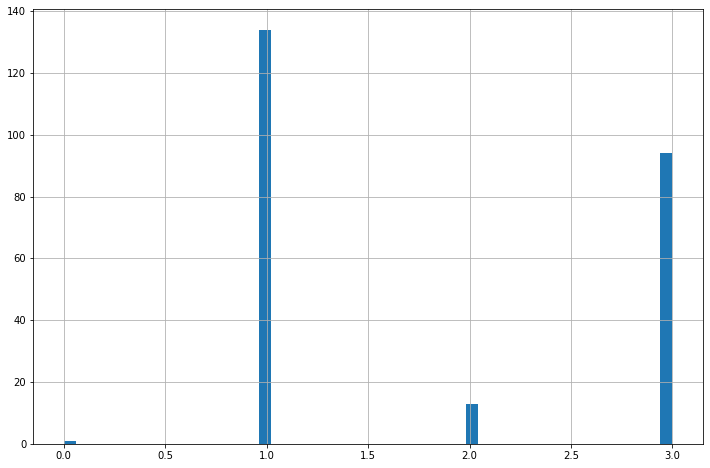

In [49]:
# We are just plotting histogram of Thal

X_train['Thal'].hist(figsize=(12,8),bins=50)

### Note we have not added AHD because its out targat variable 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'ChestPain'}>,
        <AxesSubplot:title={'center':'RestBP'}>],
       [<AxesSubplot:title={'center':'Chol'}>,
        <AxesSubplot:title={'center':'Fbs'}>,
        <AxesSubplot:title={'center':'RestECG'}>,
        <AxesSubplot:title={'center':'MaxHR'}>],
       [<AxesSubplot:title={'center':'ExAng'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>,
        <AxesSubplot:title={'center':'Slope'}>,
        <AxesSubplot:title={'center':'Ca'}>],
       [<AxesSubplot:title={'center':'Thal'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

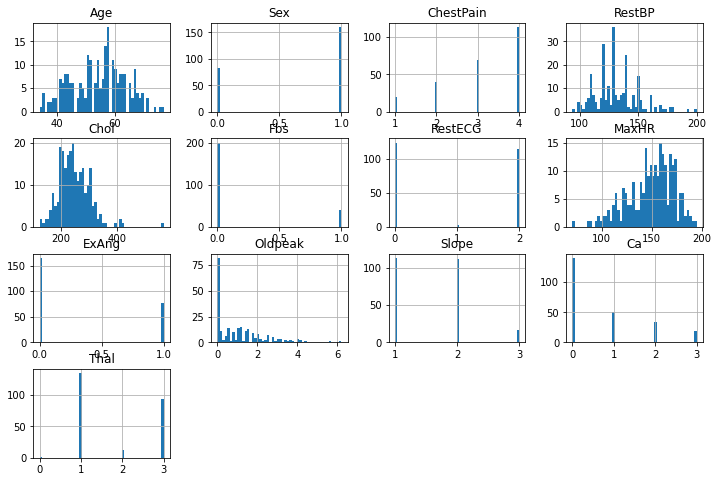

In [50]:
# Instead of Writing all the histogram seprately we can use

X_train.hist(figsize=(12,8),bins=50)

<a name='md'></a>
# Model Building 

In [51]:
# Creating instance of LogisticRegression

model=LogisticRegression()

In [52]:
# Fitting the data in the logistic Regression (Ignore Waring)

model.fit(X_train,y_train)

C:\Project\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### We got above Warning beacuse our dataset is small it has only 303 rows  

<a name='me'></a>
# Model Evaluation

In [53]:
# As we Created out model Lets test it
#We will fing Accuracy on training data

X_train_predict=model.predict(X_train)

training_data_acc=accuracy_score(X_train_predict,y_train)

print('acc score=',training_data_acc)


acc score= 0.8636363636363636


In [54]:
# Accuracy on testing data

X_test_predict=model.predict(X_test)

testing_data_acc=accuracy_score(X_test_predict,y_test)

print('acc score=',testing_data_acc)

acc score= 0.8524590163934426


<a name='bp'></a>
# Building Predictive System (optional)

In [55]:
# Here we take one custom or from testing set input and test whether the person has heart disease or not 

#input_data=(41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0)

input_data=(68,1,4,144,193,1,0,141,0,3.4,2,2.0,3.0)


#changing input tuple to numpy array

data=np.asarray(input_data)


#reshaping the numpy array as we are predicting for only  on instance

new_data=data.reshape(1,-1)


# predicting on new data

new_predict=model.predict(new_data)

# Printing predicting value

#print(new_predict)


if(new_predict[0]==0):
    
    print('The Person does not have Heart Disease')

else:
    
    print("The Person have Heart Disease")


The Person have Heart Disease


C:\Project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<a name='c'></a>
# Conclusion

### This Algorithm performed well,

### Here we had only 303 rows, it very less data to train a model on  then too our model performed uite well we achieved above 85% accuracy on trainig data and 82% in testing data without getting overfitted

### Logistic regression provides a useful means for modelling the dependence of a binary response variable on one or more explanatory variables, where the latter can be either categorical or continuous. The fit of the resulting model can be assessed using a number of methods.

### We created custom input and tested it, in Building Predictive System section it also worked properly.

### Thats it we are done with Logistic Regression Algorithm.....!!!